<a href="https://colab.research.google.com/github/15gsaavedra/DDDS-My-Projects/blob/main/Project-1/Project_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 1 - Will customers make a transaction?



## Problem Definition

This is a supervised binary classification problem with the goal of predicting whether or not a future customer will make a transaction based on their transaction data.



## Data Collection

In [2]:
# Import library resources.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets, metrics, model_selection
from sklearn import model_selection
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image

In [3]:
# Load the provided dataset and display it.
link = "https://ddc-datascience.s3.amazonaws.com/Projects/Project.1-Transactions/Data/Transaction.train.big.csv"

t = pd.read_csv(link)
print(t)

         Unnamed: 0        ID_code  target    var_0    var_1    var_2  var_3  \
0                 0        train_0     NaN      NaN      NaN      NaN    NaN   
1                 1        train_1     NaN      NaN      NaN      NaN    NaN   
2                 2        train_2     NaN      NaN      NaN      NaN    NaN   
3                 3        train_3     0.0   4.6739  22.3915  15.6015    NaN   
4                 4        train_4     NaN      NaN      NaN      NaN    NaN   
...             ...            ...     ...      ...      ...      ...    ...   
1049995     1049995  train_1049995     1.0  11.3251  16.4148  20.5955    NaN   
1049996     1049996  train_1049996     NaN      NaN      NaN      NaN    NaN   
1049997     1049997  train_1049997     0.0   8.9941  13.4127   3.9567    NaN   
1049998     1049998  train_1049998     NaN      NaN      NaN      NaN    NaN   
1049999     1049999  train_1049999     0.0   2.1828  12.3805  17.5654    NaN   

          var_4  var_5  var_6  ...  var

## Data Cleaning



In [4]:
t.info() # Display the data set's shape and data types.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050000 entries, 0 to 1049999
Columns: 104 entries, Unnamed: 0 to var_100
dtypes: float64(102), int64(1), object(1)
memory usage: 833.1+ MB


In [5]:
t.describe(include = 'all') # Display qualitative and quantitative information about the data set's columns.

,Unnamed: 0,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,...,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100
count,1.050000e+06,1050000,180000.000000,180000.000000,180000.000000,180000.000000,0.0,180000.000000,0.0,0.0,...,0.0,180000.000000,0.0,180000.000000,0.0,0.0,0.0,0.0,0.0,180000.000000
unique,NaN,1050000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,train_1049983,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.249995e+05,NaN,0.100222,7.440715,15.870166,12.735619,NaN,-0.668334,NaN,NaN,...,NaN,-3.294620,NaN,-6.727860,NaN,NaN,NaN,NaN,NaN,14.224538
std,3.031090e+05,NaN,0.300297,3.021636,3.010492,4.185923,NaN,5.968300,NaN,NaN,...,NaN,7.418545,NaN,8.278554,NaN,NaN,NaN,NaN,NaN,0.171058
min,0.000000e+00,NaN,0.000000,-2.691700,6.299300,-1.018500,NaN,-22.748700,NaN,NaN,...,NaN,-29.984000,NaN,-35.211700,NaN,NaN,NaN,NaN,NaN,13.729000
25%,2.624998e+05,NaN,0.000000,5.160325,13.830400,9.664675,NaN,-4.997500,NaN,NaN,...,NaN,-8.757925,NaN,-12.835875,NaN,NaN,NaN,NaN,NaN,14.098900
50%,5.249995e+05,NaN,0.000000,7.350950,15.934600,12.670700,NaN,-0.560300,NaN,NaN,...,NaN,-3.170950,NaN,-6.615100,NaN,NaN,NaN,NaN,NaN,14.226800
75%,7.874992e+05,NaN,0.000000,9.511125,18.061425,15.837300,NaN,3.632525,NaN,NaN,...,NaN,2.043350,NaN,-0.885250,NaN,NaN,NaN,NaN,NaN,14.361800


'Unnamed: 0' is expected to be a unique identifier based on the visual display of the data set in which the column's displayed values were all equal to those of the index.

'ID_code' is expected to be a unique identifier because the unique and count values in the display directly above are equal.

We recommend removing both columns as they contribute no useful information for our analysis.

In [6]:
# Display the number of null values contained in each column.
t.isnull().sum()

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
...,...
var_96,1050000
var_97,1050000
var_98,1050000
var_99,1050000


Some of the variable columns are entirely full of null values and we recommend removing all said columns.

In [7]:
# Create a copy of the initial data set that we may clean without adjusting the original.
tclean = t.copy()

In [8]:
# Remove the columns with less than four non-null values, then redisplay null values per column.
tclean.dropna(thresh = 4, axis = 1, inplace = True)
tclean.isnull().sum()

,0
Unnamed: 0,0
ID_code,0
target,870000
var_0,870000
var_1,870000
var_2,870000
var_4,870000
var_7,870000
var_8,870000
var_14,870000


In [9]:
# Display the remaining number of columns.
tclean.shape

(1050000, 53)

In [10]:
# Display the number of null values per row.
tclean.transpose().isnull().sum()

,0
0,51
1,51
2,51
3,0
4,51
...,...
1049995,0
1049996,51
1049997,0
1049998,51


We see that many rows are all null except for the unique identifiers and recommend removing those rows.

In [11]:
#print(tclean.transpose())

In [12]:
# Remove the rows with less than 4 non null values and redisplay the number of null values per row.
tclean.dropna(thresh = 4, axis = 0, inplace = True)
tclean.transpose().isnull().sum()

,0
3,0
5,0
11,0
15,0
19,0
...,...
1049990,0
1049993,0
1049995,0
1049997,0


In [13]:
# Display the remaining number of rows and columns.
print(tclean.shape)
#print(tclean)

(180000, 53)


In [14]:
#tclean.describe(include = "all")

In [15]:
# Remove unique identifier columns.
tclean.drop(['Unnamed: 0','ID_code'],axis = 1, inplace = True)
#tclean.head()

## Exploratory Data Analysis





<ipython-input-16-d490427255fc>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure();


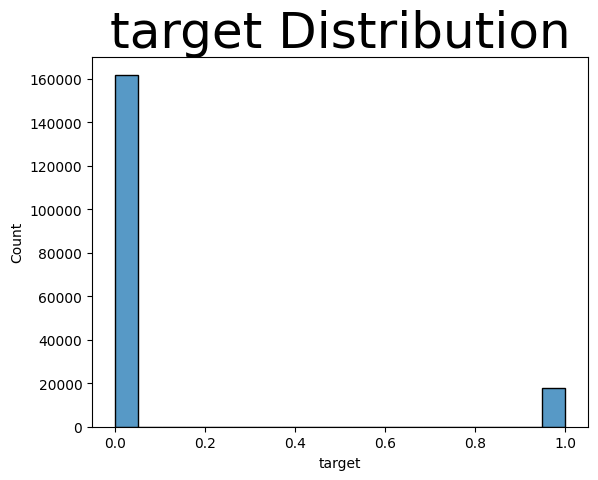

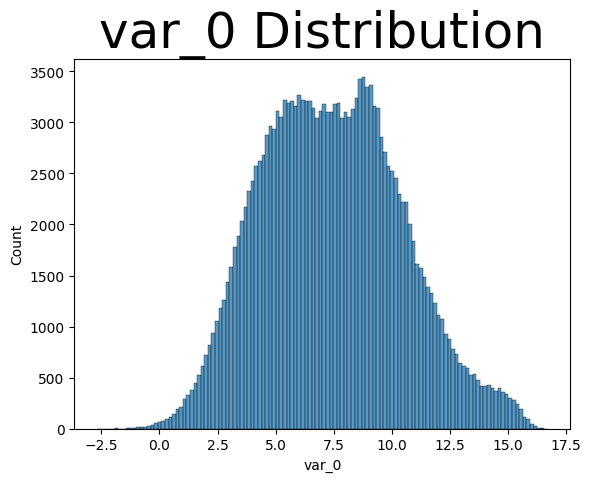

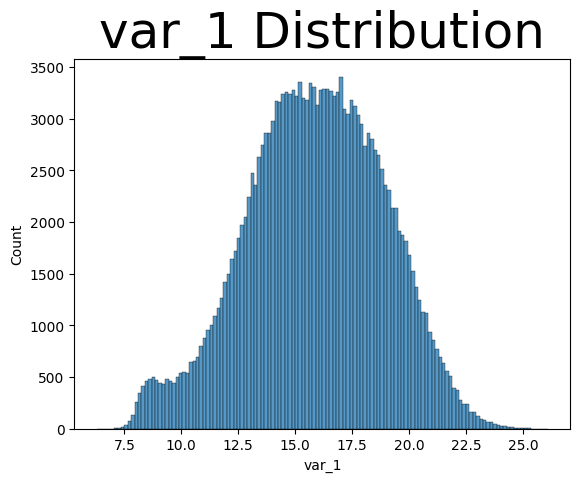

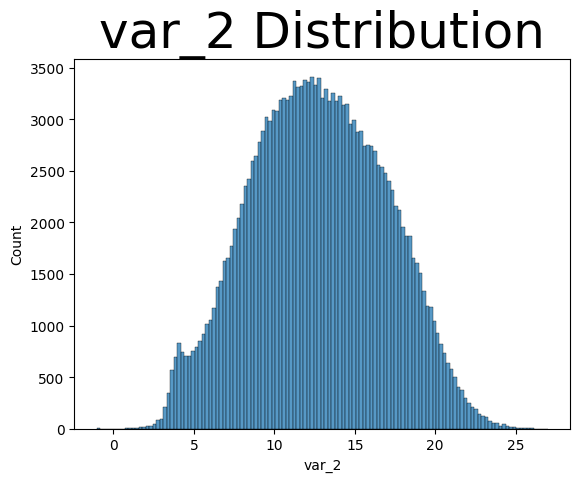

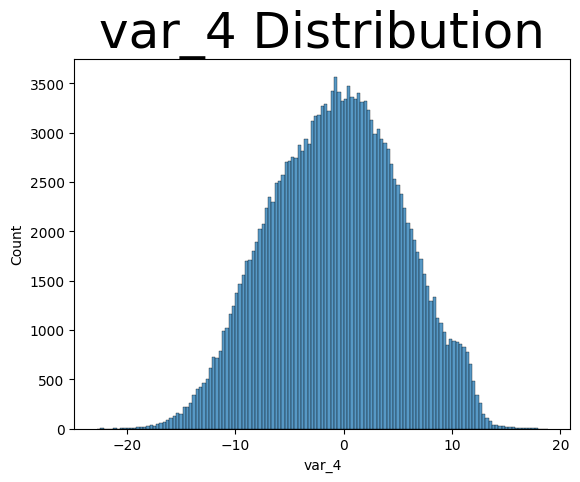

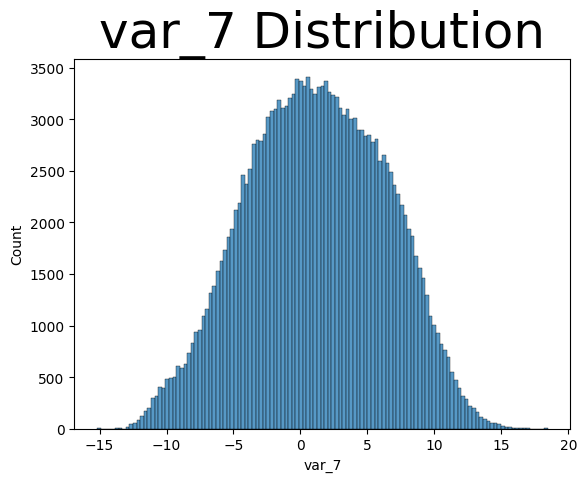

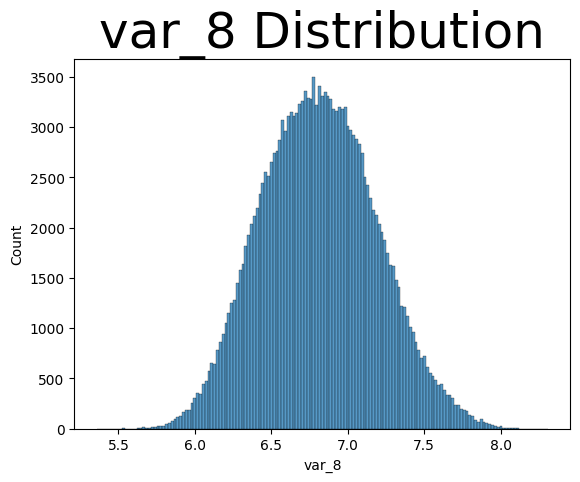

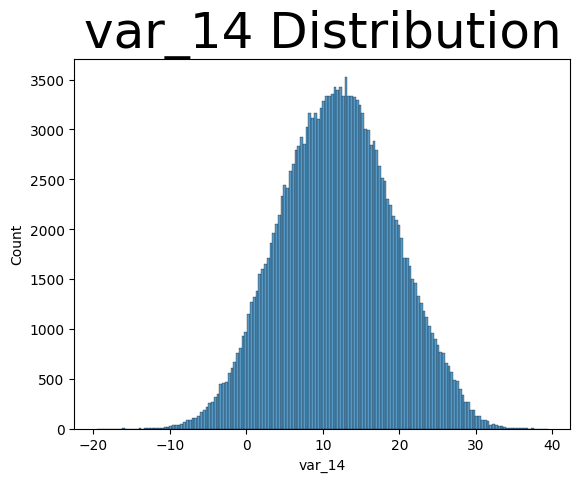

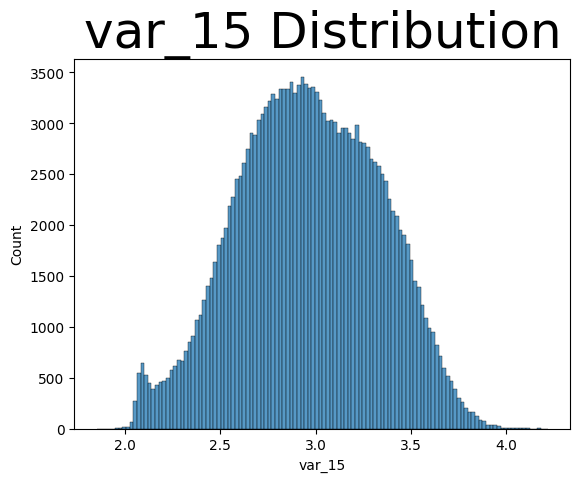

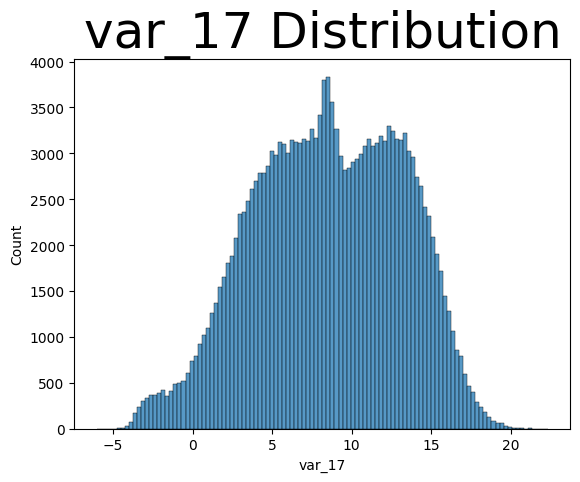

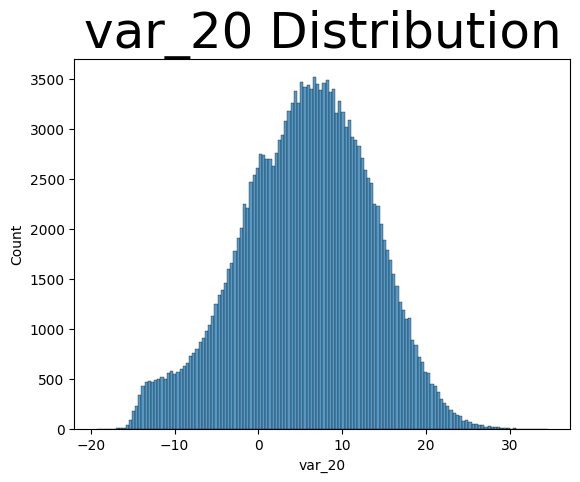

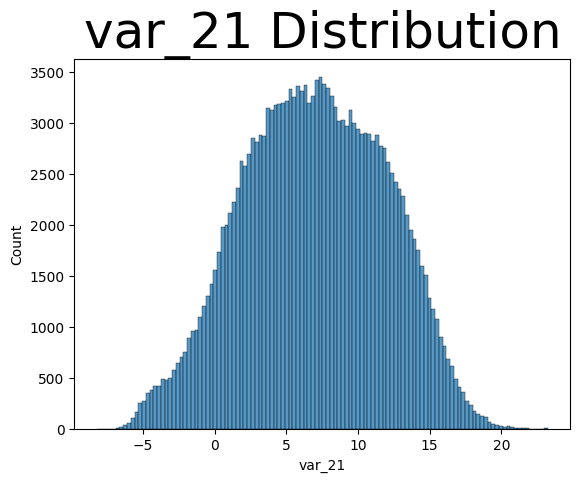

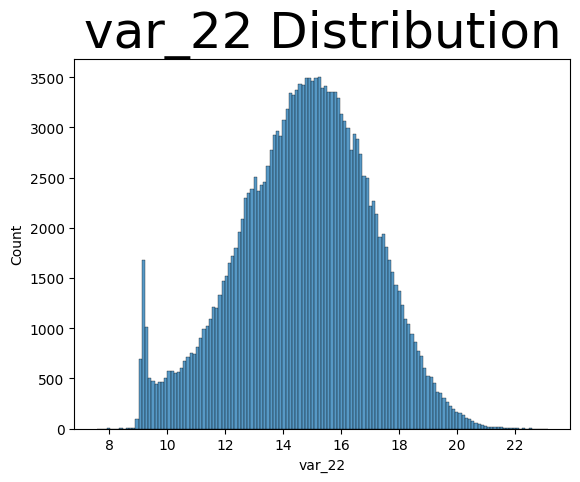

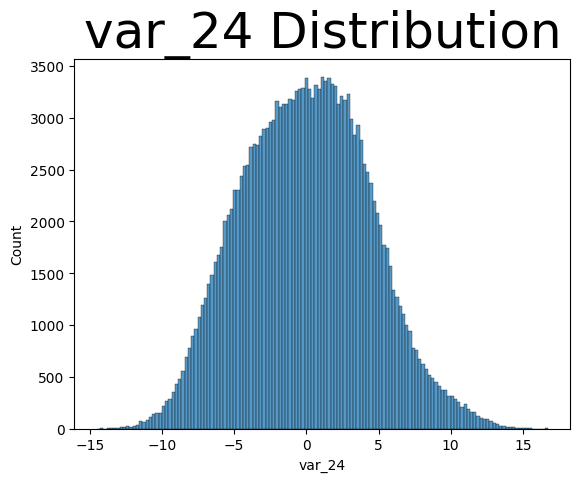

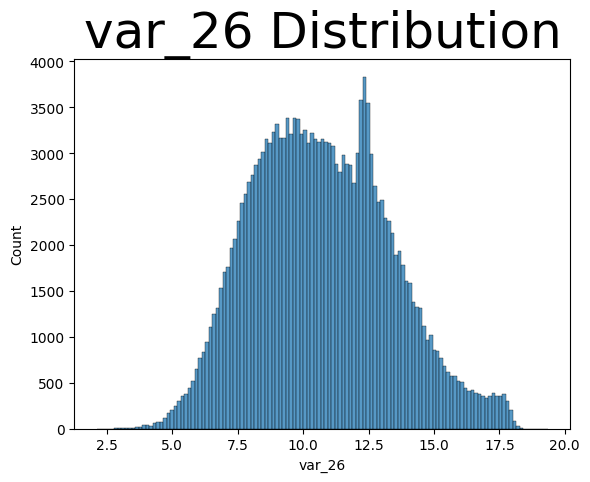

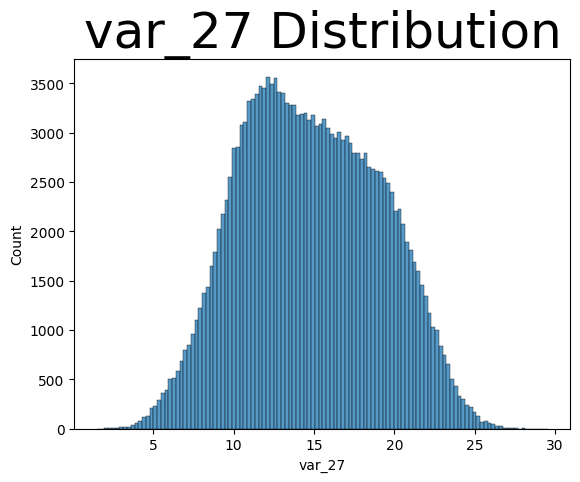

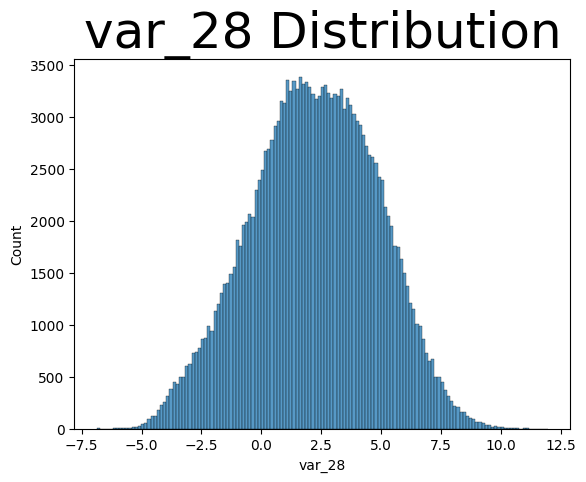

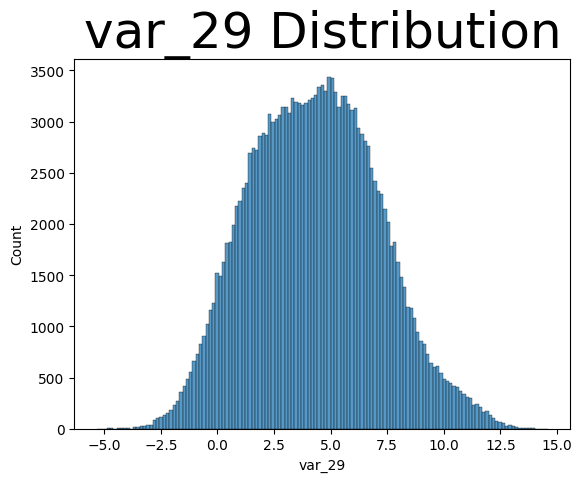

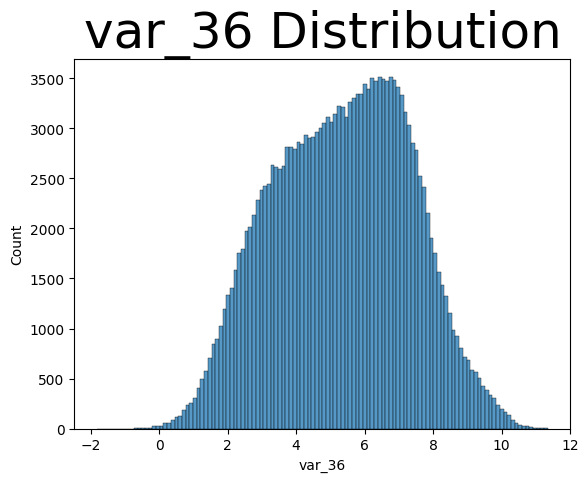

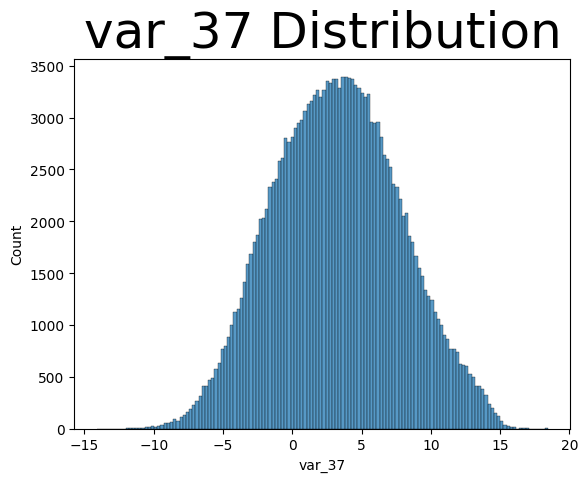

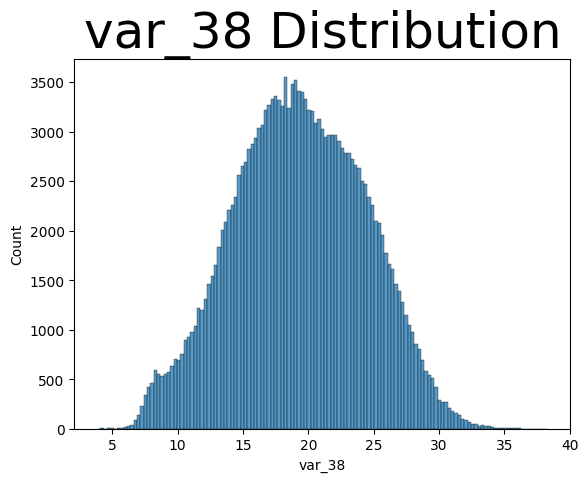

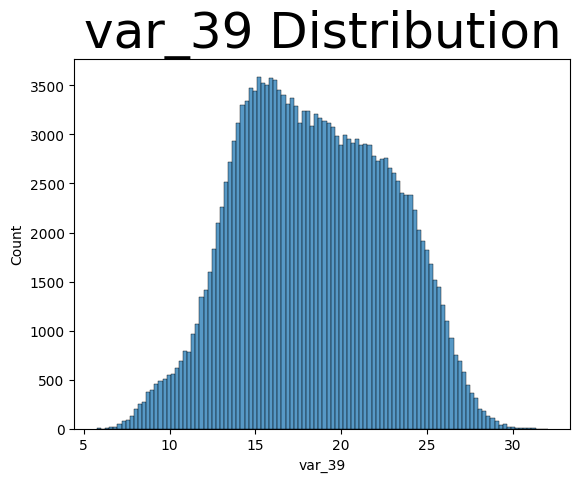

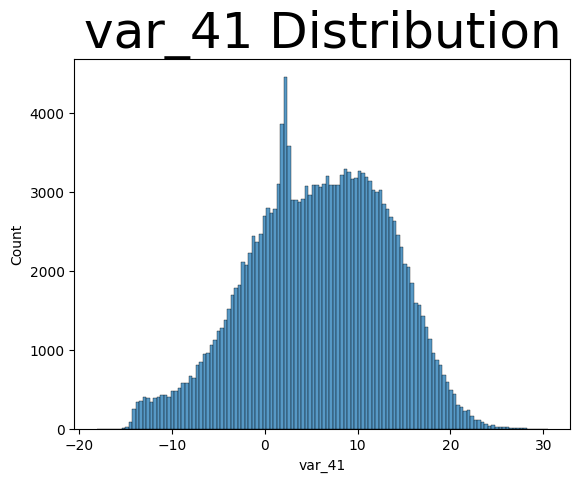

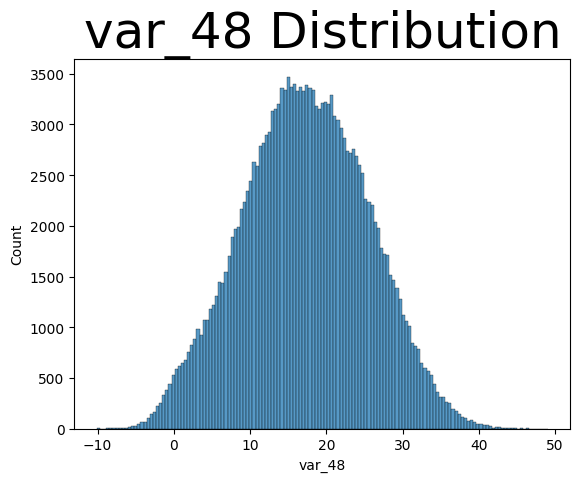

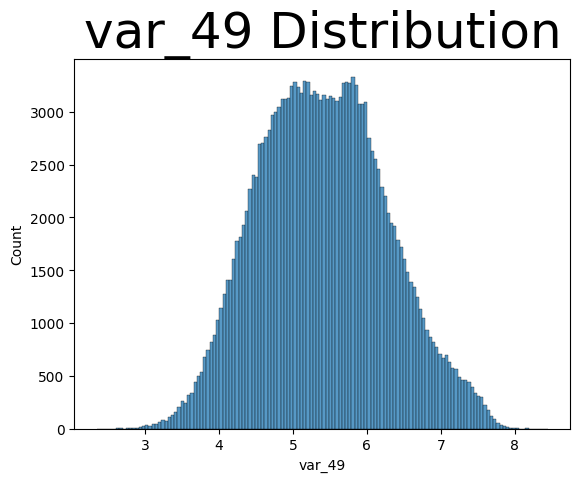

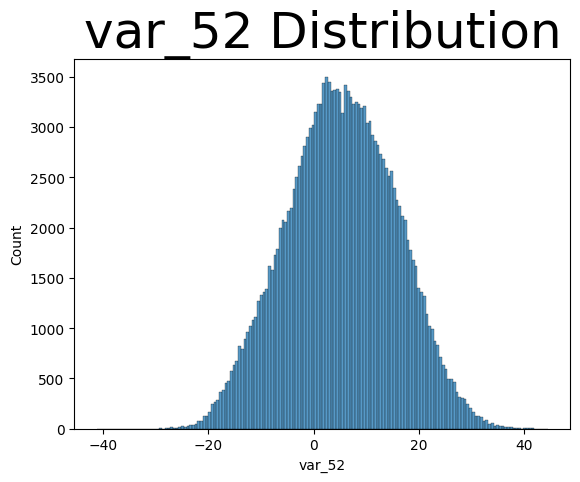

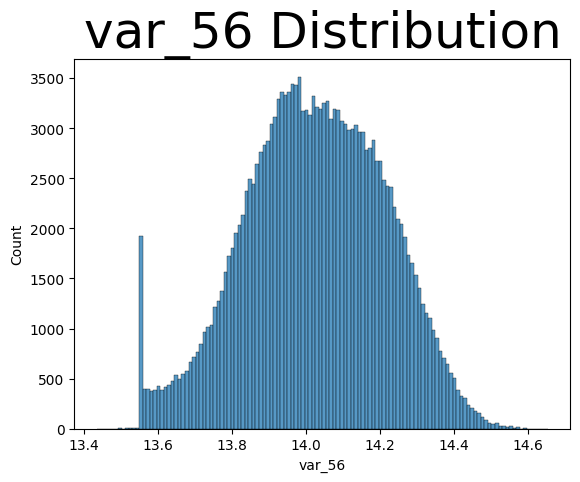

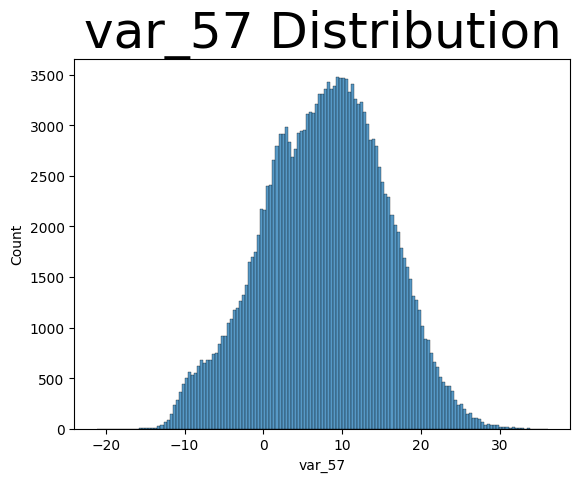

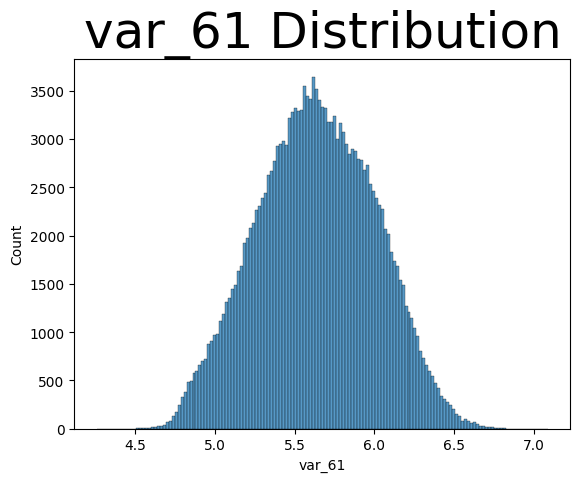

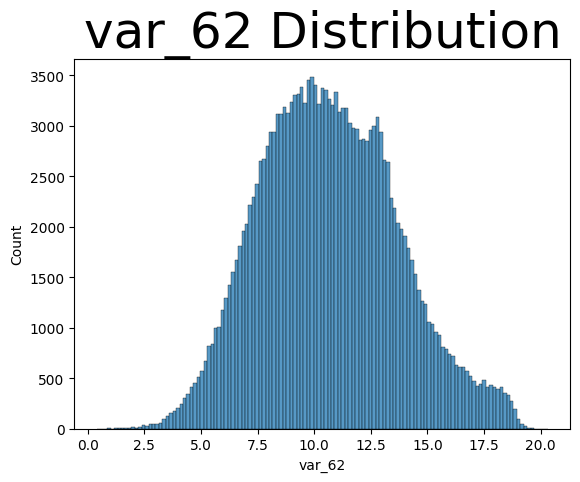

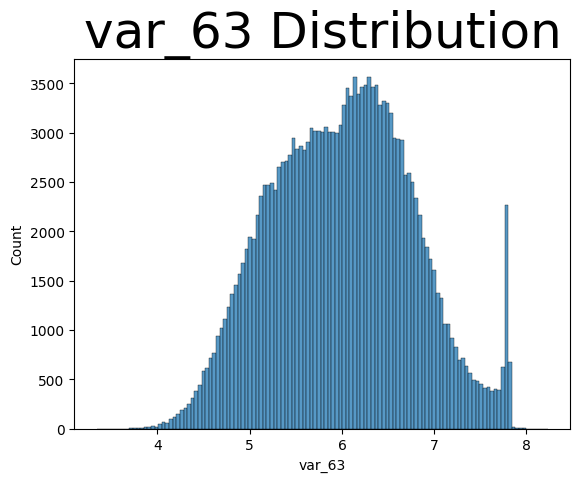

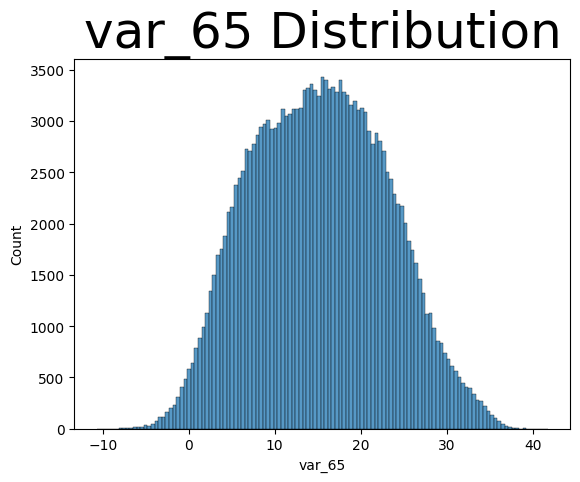

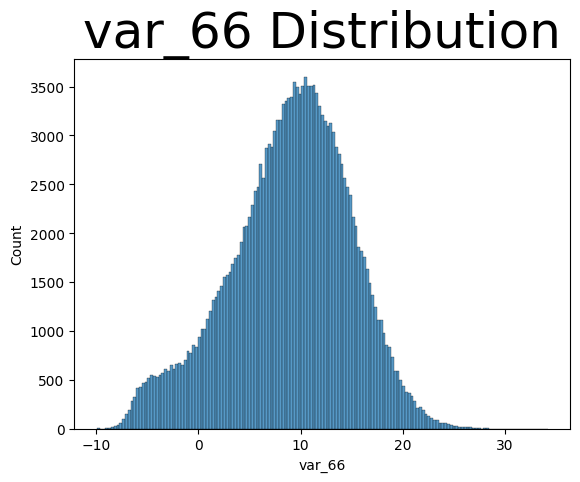

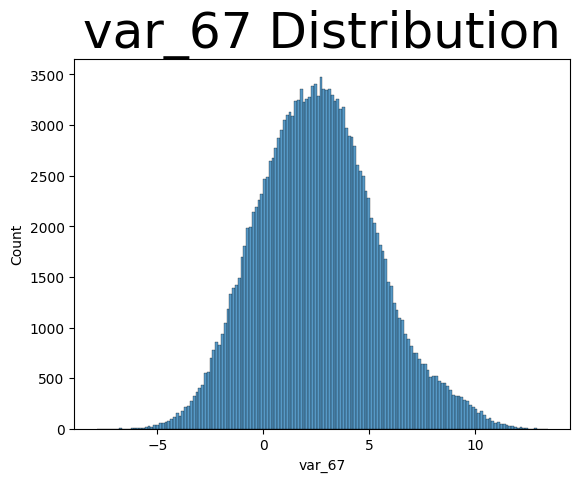

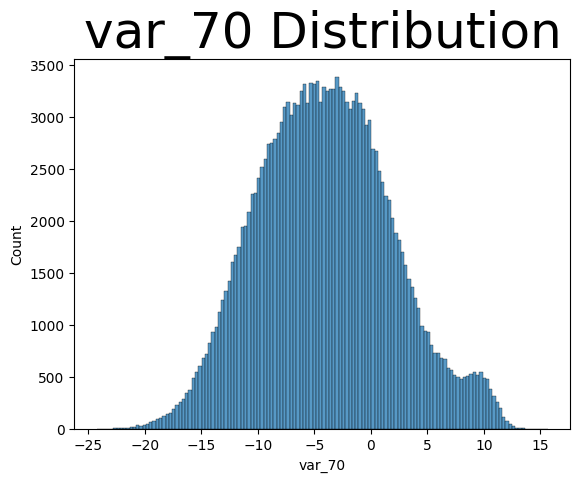

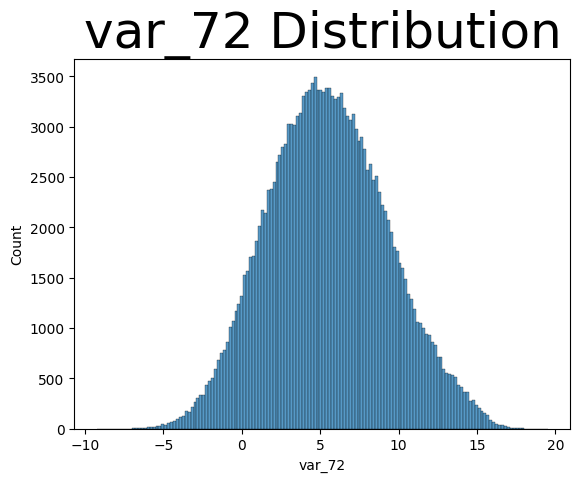

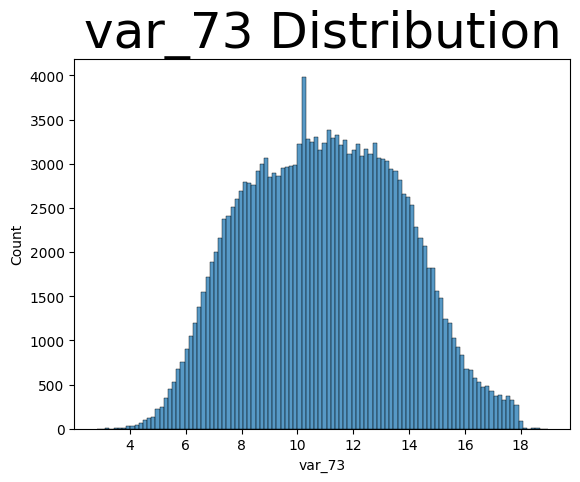

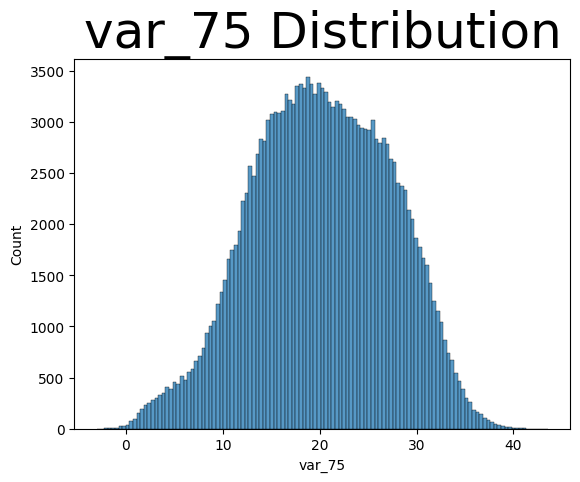

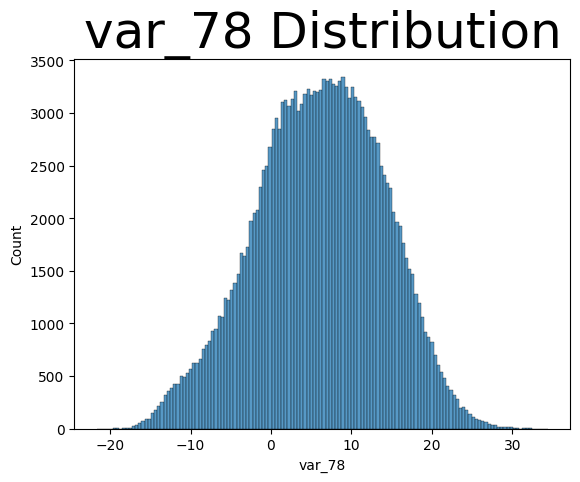

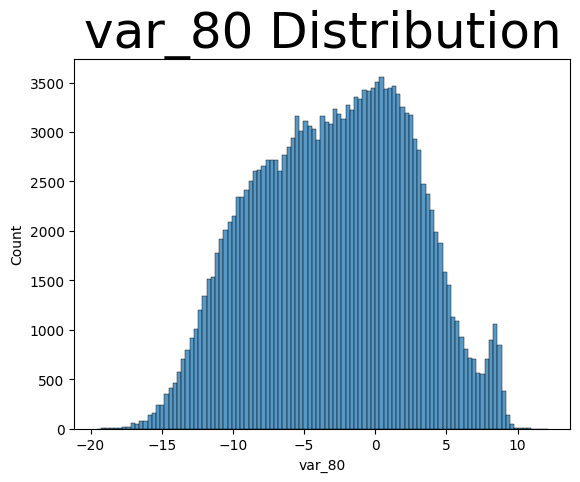

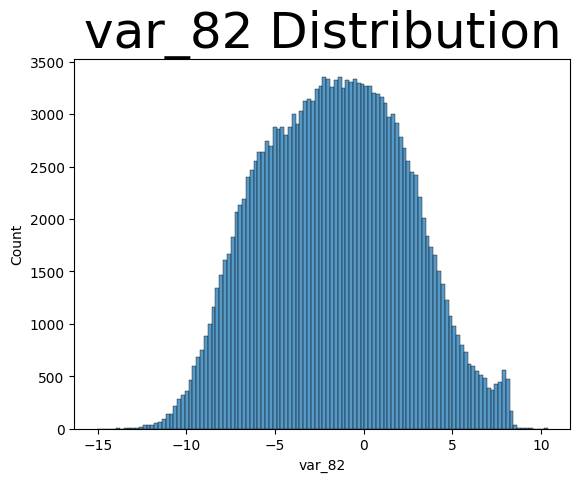

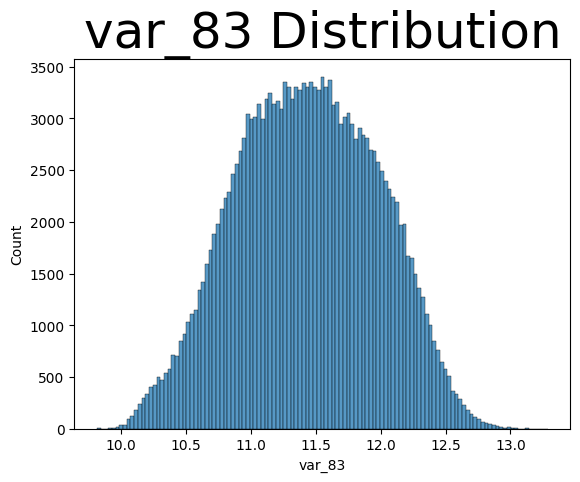

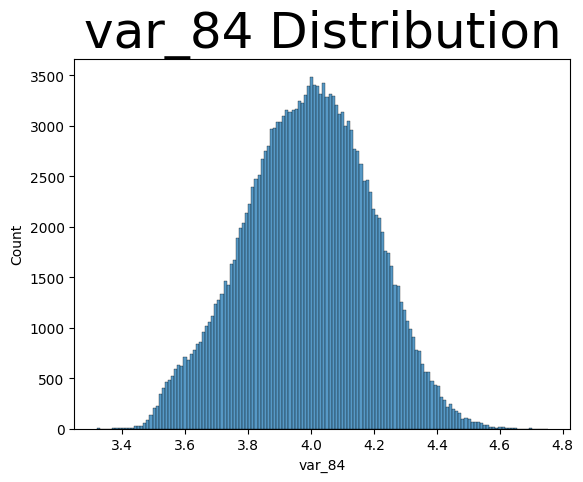

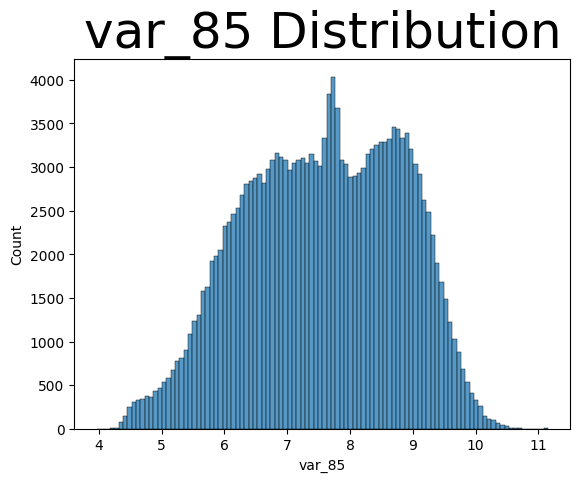

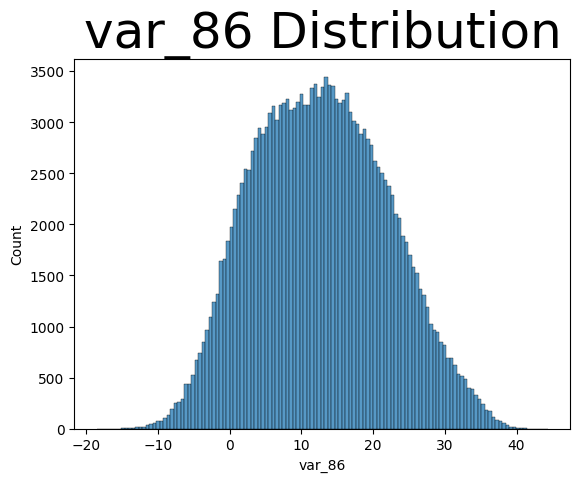

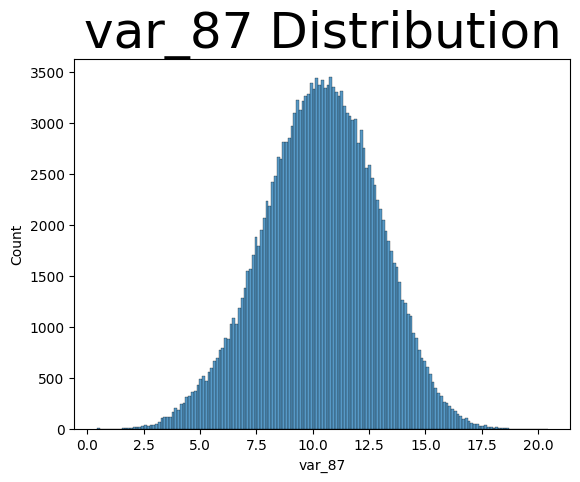

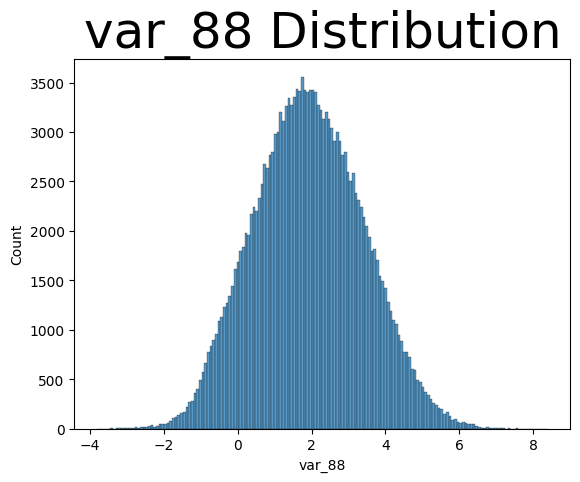

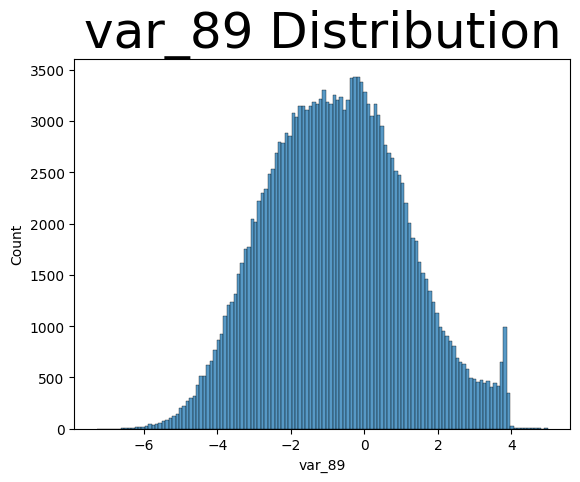

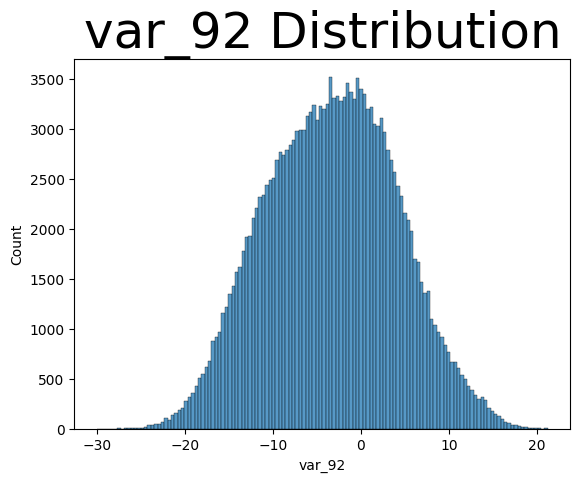

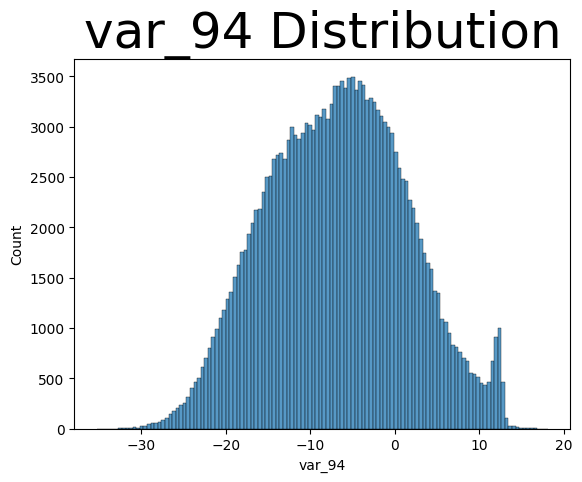

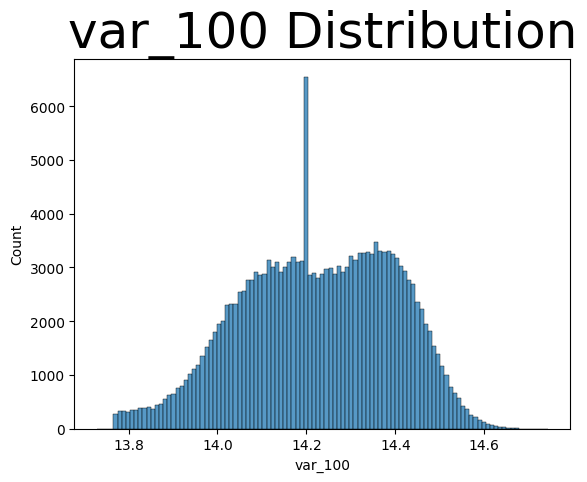

In [16]:
# Display histogram plots for the distribution of each variable.
for i in tclean:   # (step six)
  plt.figure();
  sns.histplot(tclean[i]);
  table_name = str(i);
  plt.title(f'{table_name} Distribution', size=36)



The histograms displaying the distribution of each variable show that our input distributions are sufficiently close to normal for use with naive bayes.

In [17]:
# Display unique values from the 'target' column to confirm that there are only 1s and 0s.
tclean['target'].unique()

array([0., 1.])

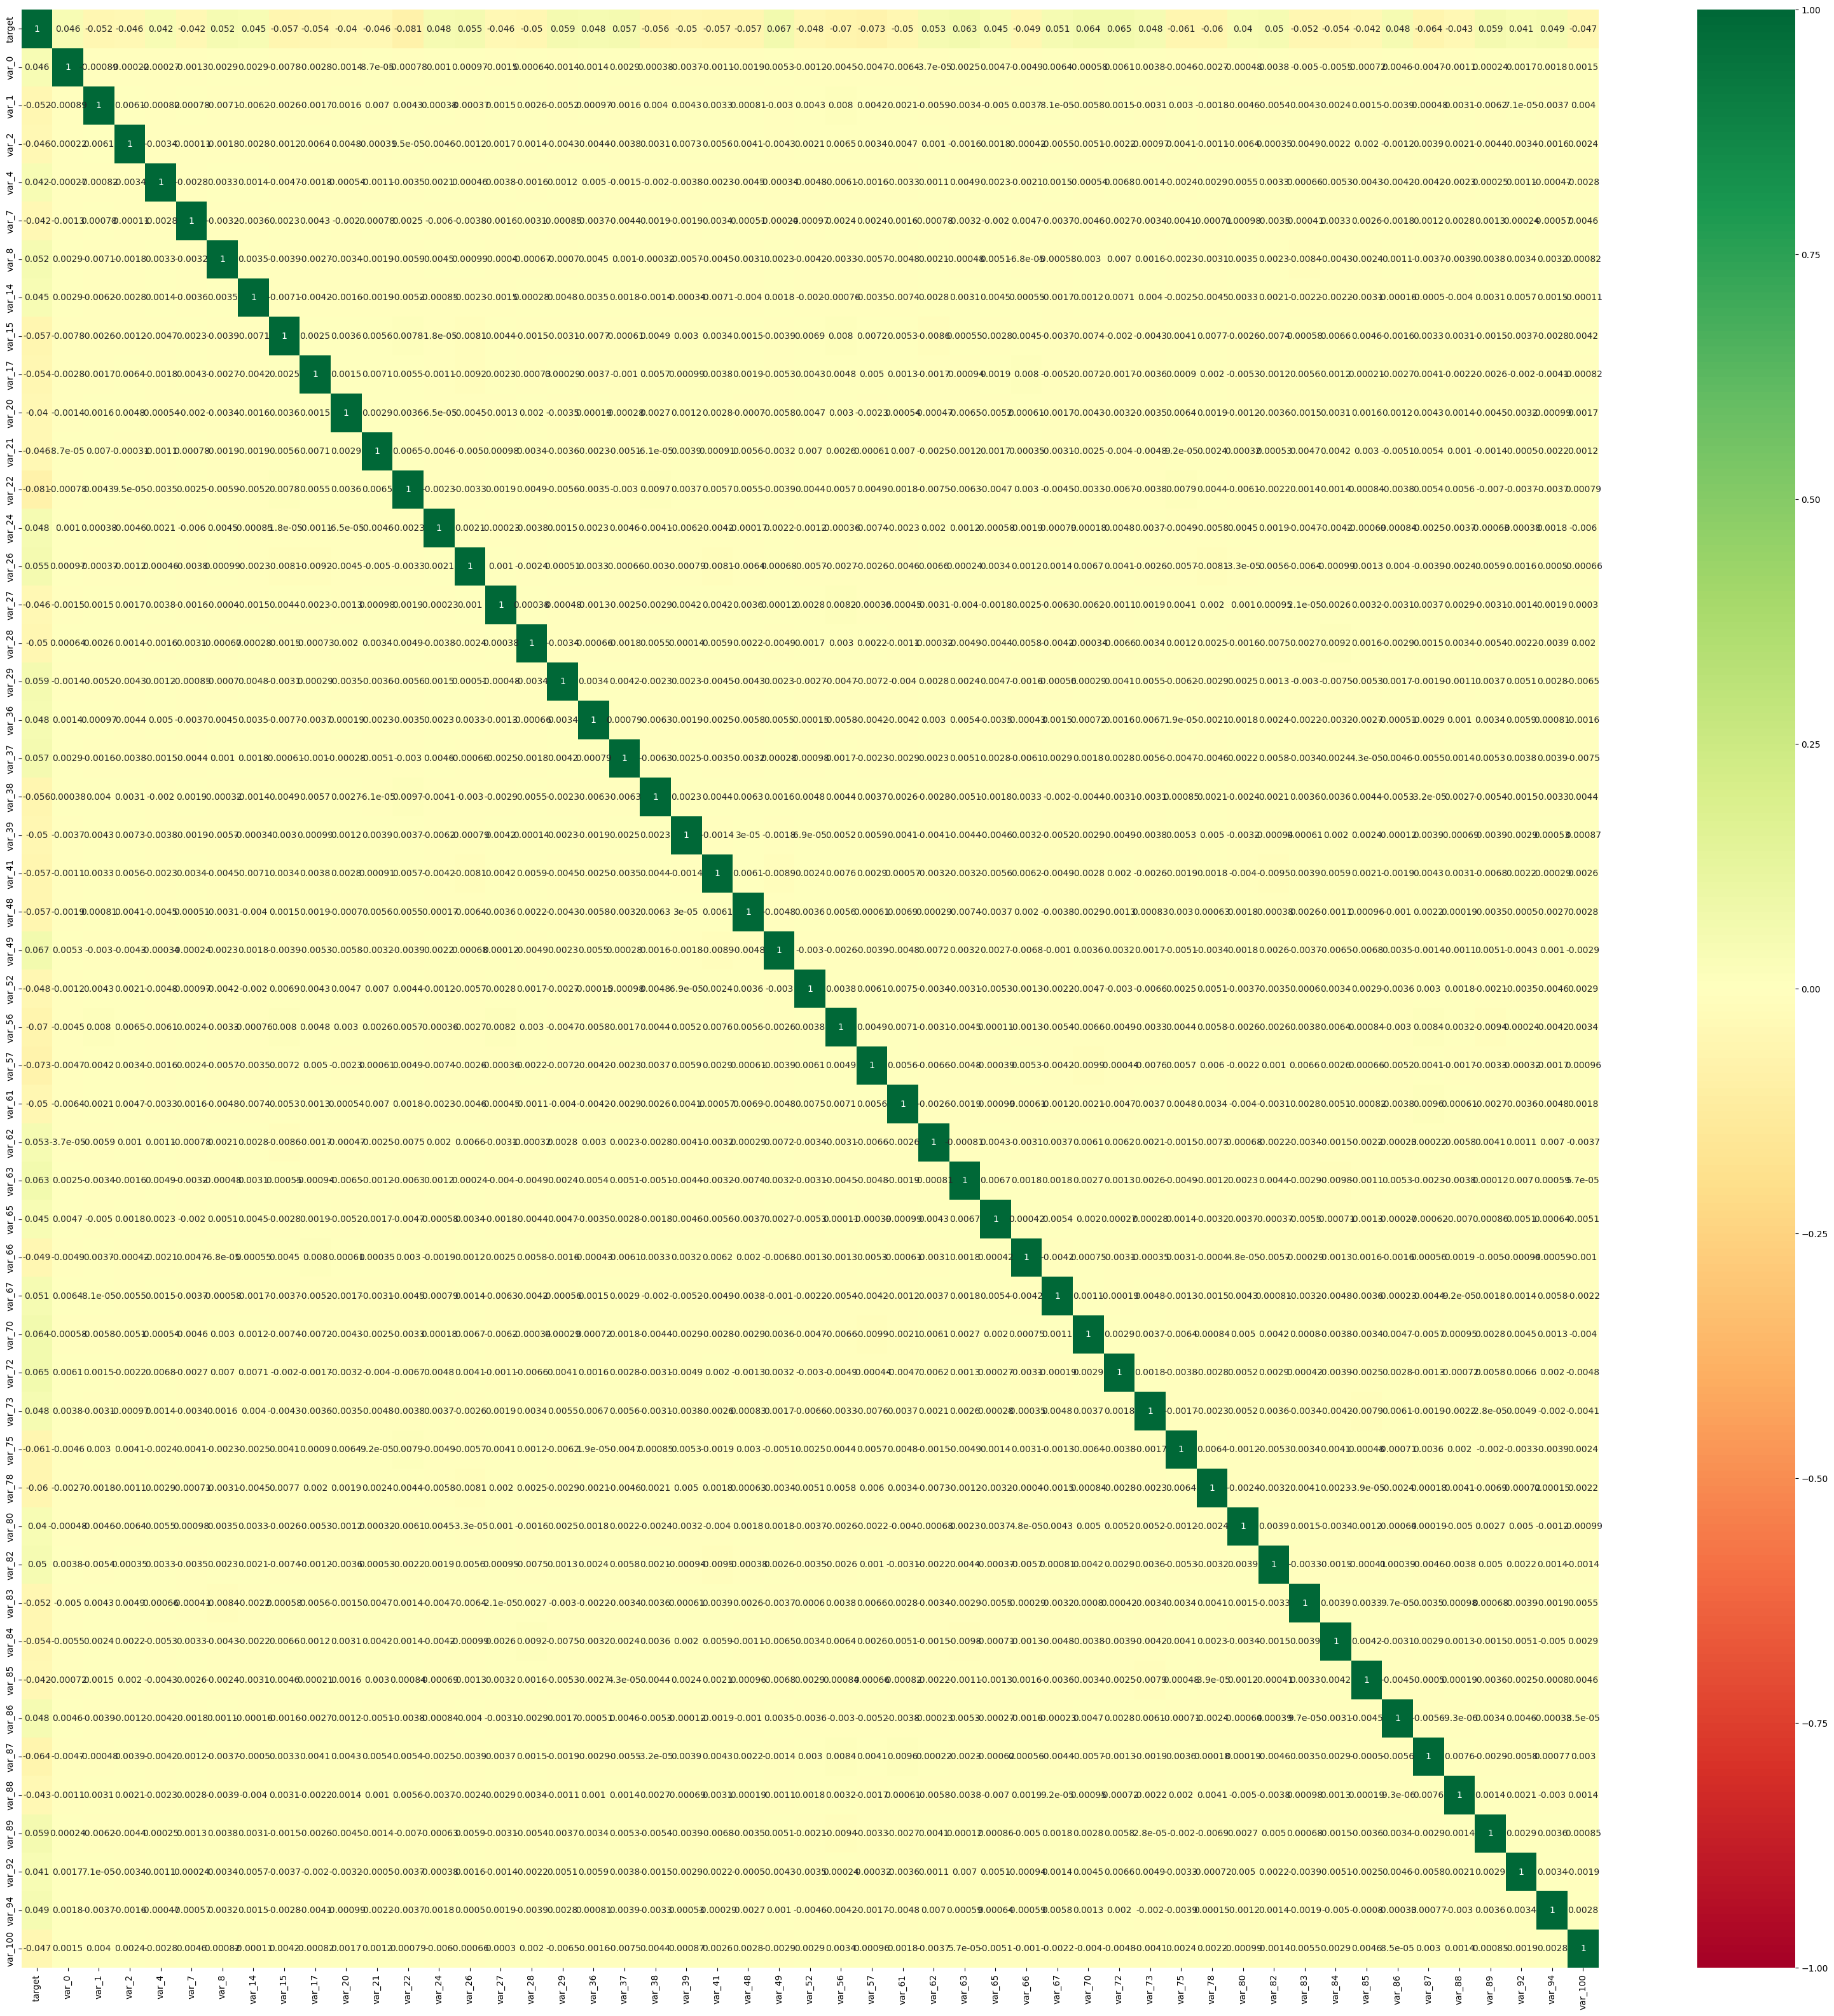

In [18]:
# Display the correlation values between all remaining variables in the data set.
corr = tclean.corr()
plt.figure(figsize=(40,40));
sns.heatmap(corr, cmap='RdYlGn',annot = True, vmin = -1);

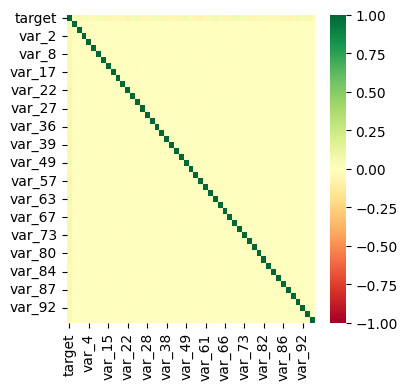

In [19]:
corr = tclean.corr()
plt.figure(figsize=(4,4));
sns.heatmap(corr, cmap='RdYlGn',annot = False, vmin = -1);

The correlation matrix above shows supports that there is no significant correlation between predictor columns.

In [20]:
#print(tclean.target)

## Data Processing

10. Create two data frames: one with all the predictor columns (everything except for Unnamed: 0, ID_code and target) and one with just the target. Make sure they are copies and not slices.

1. Define a Gaussian Naïve Bayes model using Sklearn.

1. Divide the two data frames you created in step #10 into training and testing subsets.

1. Train the model using the training subset of the dataset.

1. Test the model using the testing subset of the dataset. Calculate and report the accuracy.

1. Perform a cross-validation loop to calculate the accuracy of your model. Report that accuracy. How does it compare to the accuracy you calculated in #14?

1. Plot a histogram of the accuracy scores you generated in your cross-validation loop. What do you notice about the distribution of accuracy scores?

1.  Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report). What do you notice?

1. The training data is very skewed towards non-successful transactions (about 90% of the training data has ‘target’==0). Remove enough non-successful transaction rows so that your remaining training data is 50%/50% split between successful and non-successful transactions. Hint: you can use the data frames you created in step #9.

1. Repeat the cross-validation process on this data set. Report what your cross-validation accuracy is in this 50/50 case.



In [21]:
# Create two separate data frames where one only displays the 'target' column
#      and the other only displays the predictor columns.
# Display the shapes of these new data frames.
success = tclean.copy()    # (step nine)
success = success[success.target == 1.0]
failiure = tclean.copy()
failiure = failiure[failiure.target == 0.0]
#print(success.head())
#print(failiure.head())
print(success.shape)
print(failiure.shape)

(18040, 51)
(161960, 51)


In [22]:
target_only = tclean.target.copy() # (step ten)
#print(target_only)

In [23]:
predictors = tclean.copy().drop(columns = 'target')   # (step ten)
#print(predictors.head())

In [24]:
#plt.figure(figsize = (8,8))
#predictors.hist();


In [25]:
#plt.figure(figsize = (30,30));
#predictors.hist();
#plt.tight_layout();
#plt.show();

In [26]:
gnb=GaussianNB()  # (step eleven)

In [27]:
y = target_only     # (step twelve)
X = predictors

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)


In [28]:
y_pred.shape

(36000,)

In [29]:
show_mistakes = (y_test.to_numpy() - y_pred)*1000
show_mistakes

array([   0., 1000.,    0., ...,    0.,    0.,    0.])

In [30]:
just_mistakes = show_mistakes[show_mistakes != 0]
just_mistakes

array([ 1000., -1000.,  1000., ...,  1000.,  1000., -1000.])

In [31]:
just_mistakes.shape

(3211,)

In [32]:
acuracy = 1-3211/36000
print(f'The acuracy was {acuracy}.')  # (step fourteen)

The acuracy was 0.9108055555555555.


In [33]:
def cross_validate(X, y, num_loops):
  """Randomly splits X and y values into train/test groups (test size = 20%).
  Creates a GaussianNB model.
  Returns a numpy array of accuracy scores for the tests.
  """

  accuracy_scores = np.zeros(num_loops)

  for i in range(num_loops):
    model_split_cv = GaussianNB()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size = 0.2)
    model_split_cv.fit(X_train, y_train)
    y_split_pred = model_split_cv.predict(X_test)
    accuracy_scores[i] = metrics.accuracy_score(y_test, y_split_pred)

  return accuracy_scores

In [34]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5)) # (step fifteen)
#print(accuracy_scores)

0.91141


The above accuracy value is less than a percet off of the one from step fourteen. (step fifteen)

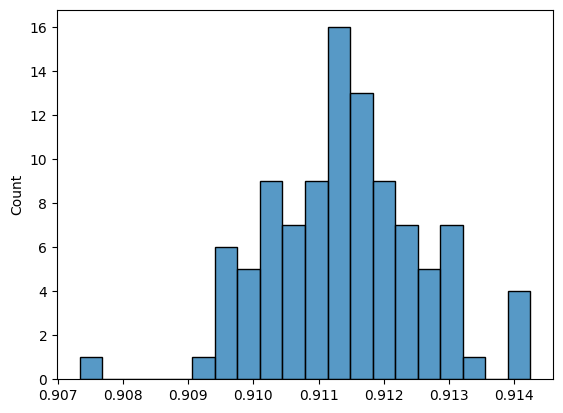

In [35]:
# (step sixteen)
plt.figure();
sns.histplot(accuracy_scores, bins = 20);

I notice that the distribution of accuracy scores are clustered together between .90 and .92 but I hesitate to call it a normal distribution due to strange peaks I get regardless of the bi sizes I've tried. (step sixteen)

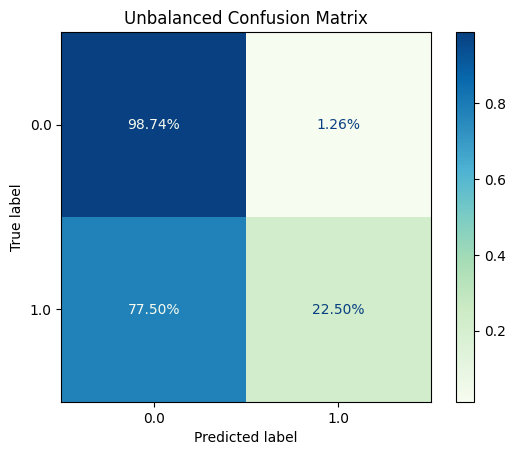

In [36]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap=('GnBu'),
    )
plt.grid(False)
plt.title('Unbalanced Confusion Matrix');
plt.savefig('unbalanced_confusion_matrix.png')

In [37]:
# metrics.classification_report(y_train,y_test)
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     32383
         1.0       0.67      0.23      0.34      3617

    accuracy                           0.91     36000
   macro avg       0.79      0.61      0.64     36000
weighted avg       0.89      0.91      0.89     36000



In [38]:
even_failiure = failiure.head(18040)
even_failiure.shape

(18040, 51)

In [39]:
even_together = pd.concat([success,even_failiure])
even_together.shape

(36080, 51)

In [40]:
y = even_together['target'].copy()     # (step nineteen)
X = even_together.copy().drop(columns = 'target')

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)

In [41]:
accuracy_scores = cross_validate(X, y, 100)
print(round(accuracy_scores.mean(), 5))

0.75521


Our cross validation accuracy in this 50/50 case is .75438.

## Data Visualization


20. Compare the results of your cross-validation with the whole training data and the reduced 50/50 training data

1. Present the confusion matrix and the results of your Classification Report (sklearn.metrics.classification_report)




The resulting accuracy from cross-validation with the whole training data was notably higher than that which resulted from using the reduced 50/50 training data. ~.91 rather than ~.75

The decrease in accuracy is expected because the unbalanced data had so many 0 results in comparrison to 1 results that predicting 0 every time would automatically produce accurate results.

While training on the balanced data produced a lower overall accuracy score, the resulting predictions were far more accurate at predicting results of 1.

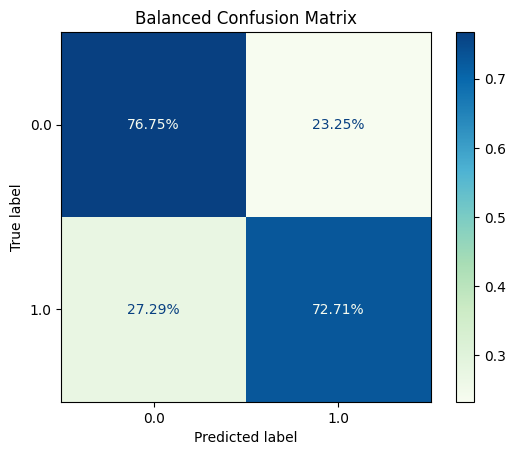

In [42]:
metrics.ConfusionMatrixDisplay.from_estimator(
    gnb,
    X_test,
    y_test,
    normalize = 'true',
    values_format = '.2%',
    cmap=('GnBu'),
    )
plt.grid(False)
plt.title('Balanced Confusion Matrix');
plt.savefig('balanced_confusion_matrix.png')

In [43]:
report = metrics.classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.74      0.77      0.75      3617
         1.0       0.76      0.73      0.74      3599

    accuracy                           0.75      7216
   macro avg       0.75      0.75      0.75      7216
weighted avg       0.75      0.75      0.75      7216



In [44]:
#Image.open("/content/unbalanced_confusion_matrix.png")

In [45]:
#Image.open("/content/balanced_confusion_matrix.png")

## Communicate the Results

22. Communicate the results of your analysis.



While individually, none of the predictor variables showed a strong correlation with our target, cumulatively they could be used to make realatively accurate predictions about the target.

### Model Performance
Using Naieve Bayes on a balanced subset of the data provided resulted in an overall prediction accuracy of 75% where negative predictions were slightly more acurate than positive predictions.

### Future Steps


## Submit Final Project

23. Upload your finished Jupyter notebook to your Project 1 student folder.
